###### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Antoine's Equation

Initialize the IPython workspace with with default settings for plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'figure.figsize':(10,6)})
plt.rcParams.update({'font.size':12})
plt.rcParams.update({'lines.linewidth':1.6})

## Introduction

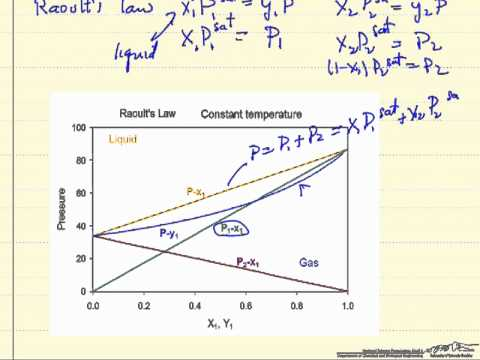

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('Adr9_2LnQdw') 

## Vapor Pressure of Pure Components

The calculations in this notebook are for a representative system of two components, acetone and ethanol. We start by creating two functions to estimate vapor pressure for the individual species using Antoine's equation.

In [3]:
# Antoine's equations
A = 'acetone'
B = 'ethanol'

def PsatA(T):
    return 10**(7.02447 - 1161.0/(T + 224))

def PsatB(T):
    return 10**(8.04494 - 1554.3/(T + 222.65))

Create plots for the vapor pressure of each component as a function of temperature.

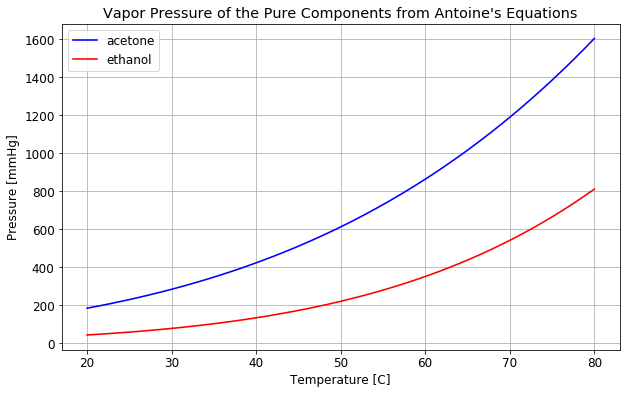

In [4]:

# Plot pure component vapor pressures
T = np.linspace(20,80)

plt.plot(T,PsatA(T),'b')
plt.plot(T,PsatB(T),'r')

plt.ylabel('Pressure [mmHg]')
plt.xlabel('Temperature [C]')
plt.legend([A,B],loc='best')
plt.title("Vapor Pressure of the Pure Components from Antoine's Equations")
plt.grid();

## A Short Database of Antoine Equations for Selected Compounts

In [5]:
# Psat by Antoine's equation for selected compounds
Psat = dict()
Psat_Tmin = dict()
Psat_Tmax = dict()

Psat['benzene'] = lambda T: 10**(6.90565 - 1211.033/(T + 220.790))
Psat_Tmin['benzene'] = 8
Psat_Tmax['benzene'] = 103
    
Psat['ethanol'] = lambda T: 10**(8.04494 - 1554.3/(T + 222.65))
Psat_Tmin['ethanol'] = -2
Psat_Tmax['ethanol'] = 100
    
Psat['methanol'] = lambda T: \
    (T <= 65) and 10**(7.89750 - 1474.08/(T + 229.13)) or \
    (T > 65) and 10**(7.97328 - 1515.14/(T + 232.85))
Psat_Tmin['methanol'] = -14
Psat_Tmax['methanol'] = 110
    
Psat['toluene'] = lambda T: 10**(6.95464 - 1344.8/(T + 219.48))
Psat_Tmin['toluene'] = 6
Psat_Tmax['toluene'] = 137

Psat['water'] = lambda T: \
    (T <= 60) and 10**(8.10765 - 1750.286/(T + 235.0)) or \
    (T > 60) and 10**(7.96681 - 1668.21/(T + 228.0))
Psat_Tmin['water'] = 0
Psat_Tmax['water'] = 150


# Tsat functions
Tsat = dict()
Tsat_Pmin = dict()
Tsat_Pmax = dict()

from scipy.optimize import brentq as fzero

for s in Psat.keys():
    Tsat_Pmin[s] = Psat[s](Psat_Tmin[s])
    Tsat_Pmax[s] = Psat[s](Psat_Tmax[s])
    Tsat[s] = lambda P,s = s: fzero(lambda T: Psat[s](T)-P,Psat_Tmin[s],Psat_Tmax[s])